In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df = pd.read_csv("C:/Users/lhi30/Haein/2023/YBIGTA/DA/Project/Share/AptOnly/Gangdong_Gu_Only.csv")

In [3]:
dfInfo = pd.read_csv("C:/Users/lhi30/Haein/2023/YBIGTA/DA/Project/Share/Data_Analysis/Reference.csv", 
                     index_col=0)

In [7]:
df

,kaptCode,bjdCode,Household_Num,Begin_Date,Heating_Method,House_Type,Elec_Con,Elev_Num,Park_Above,Park_Below
0,A13407204,1174010100,570,19860208.0,중앙난방,아파트,종합계약,19.0,355.0,0.0
1,A13407104,1174010100,2400,19831217.0,중앙난방,아파트,단일계약,49.0,2300.0,0.0
2,A13478601,1174010100,524,19860207.0,중앙난방,아파트,종합계약,18.0,462.0,0.0
3,A13407002,1174010100,768,19841016.0,개별난방,아파트,단일계약,18.0,654.0,0.0
4,A13482706,1174010100,1320,19851125.0,중앙난방,아파트,단일계약,22.0,1104.0,0.0
...,...,...,...,...,...,...,...,...,...,...
97,A10024422,1174011000,1244,20210223.0,지역난방,아파트,종합계약,37.0,19.0,1085.0
98,A10024487,1174011000,119,20200123.0,개별난방,아파트,단일계약,4.0,3.0,80.0
99,A10024468,1174011000,1239,20200828.0,지역난방,아파트,종합계약,31.0,6.0,1143.0
100,A10024440,1174011000,946,20210210.0,지역난방,아파트,단일계약,24.0,876.0,20.0


In [8]:
df.isnull().sum()

kaptCode          0
bjdCode           0
Household_Num     0
Begin_Date        0
Heating_Method    0
House_Type        0
Elec_Con          3
Elev_Num          3
Park_Above        3
Park_Below        3
dtype: int64

<AxesSubplot: >

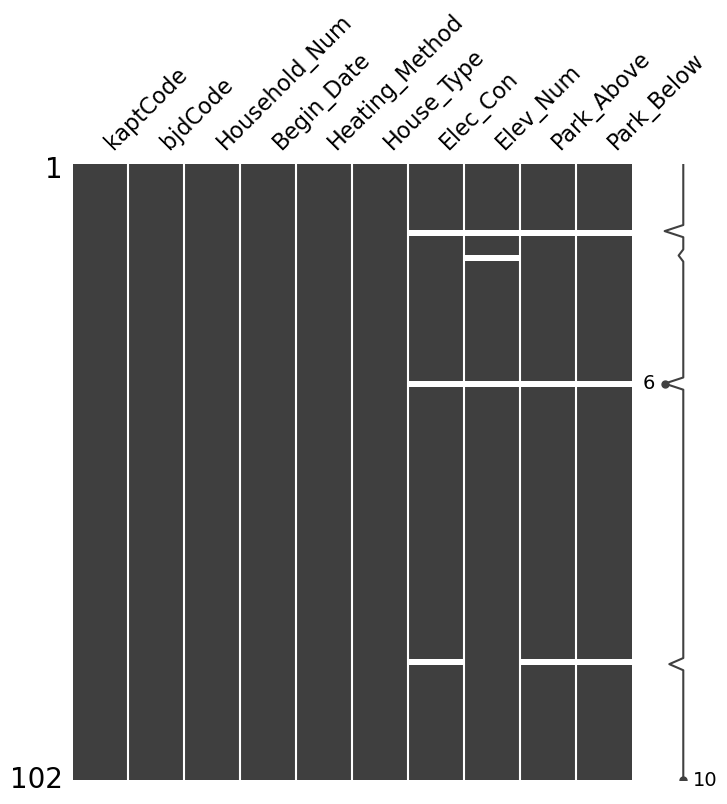

In [9]:
msno.matrix(df=df, figsize=(8, 8))

## Begin_Date

In [10]:
#null values
Begin_Date = df['Begin_Date']
print(f"There are {Begin_Date.isnull().sum()} null values, and they are located at \n{np.where(Begin_Date.isnull())[0]}")

There are 0 null values, and they are located at 
[]


In [11]:
#Drop the null values and change date values to datetime
Begin_Date = df['Begin_Date'].dropna()
Begin_Date = pd.to_datetime(Begin_Date, format = '%Y%m%d')
print(Begin_Date)

0     1986-02-08
1     1983-12-17
2     1986-02-07
3     1984-10-16
4     1985-11-25
         ...    
97    2021-02-23
98    2020-01-23
99    2020-08-28
100   2021-02-10
101   2021-02-23
Name: Begin_Date, Length: 102, dtype: datetime64[ns]


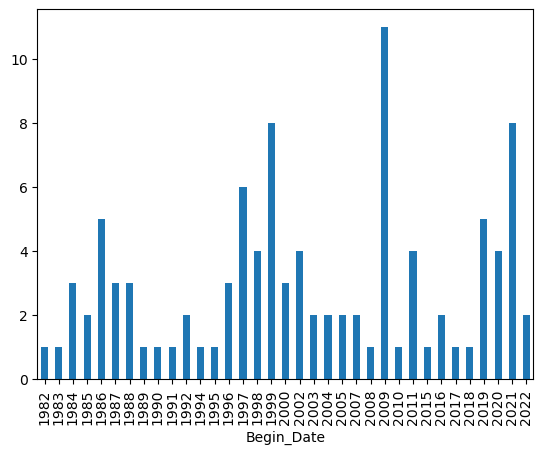

In [12]:
# distribution of years in Begin_Date
Begin_Date.groupby(Begin_Date.dt.year).count().plot(kind="bar")
plt.show()

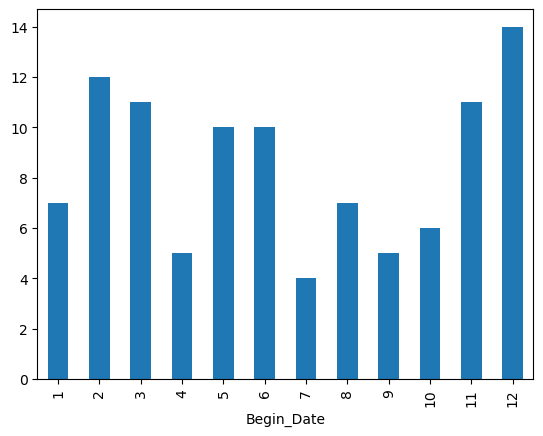

In [13]:
#Distribtion of months in Begin_Date(just for fun)
Begin_Date.groupby(Begin_Date.dt.month).count().plot(kind="bar")
plt.show()

## Household_Num

In [4]:
#1 null value
Household_Num = df['Household_Num']
print(f"There are {Household_Num.isnull().sum()} null values, and they are located at \n{np.where(Household_Num.isnull())[0]}")
display(Household_Num)

There are 0 null values, and they are located at 
[]


0       570
1      2400
2       524
3       768
4      1320
       ... 
97     1244
98      119
99     1239
100     946
101    1025
Name: Household_Num, Length: 102, dtype: int64

In [5]:
Household_Num = Household_Num.dropna()
Household_Num = Household_Num.astype('int16')

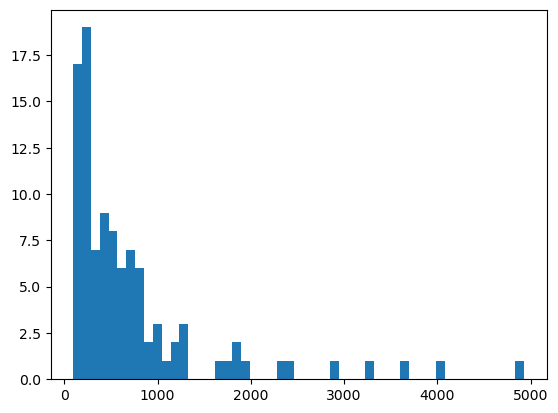

In [6]:
fig, ax = plt.subplots()
b = int(len(Household_Num)/2)
ax.hist(Household_Num, bins = b)
plt.show()

In [17]:
Household_Num.describe()

count     102.000000
mean      739.362745
std       854.821918
min        95.000000
25%       227.500000
50%       460.000000
75%       805.250000
max      4932.000000
Name: Household_Num, dtype: float64

In [18]:
def printApt (Column, df, dfInfo, maxmin = "max", ind= 0):
    if(maxmin == "max"):
        find = Column[Column == Column.max()].index[ind]
        print(df.loc[find])
        print(dfInfo[dfInfo['kaptCode'] == df.loc[find]['kaptCode']])
    elif(maxmin == "min"):
        find = Column[Column == Column.min()].index[ind]
        print(df.loc[find])
        print(dfInfo[dfInfo['kaptCode'] == df.loc[find]['kaptCode']])

In [19]:
printApt(Household_Num, df, dfInfo)

kaptCode           A10025263
bjdCode           1174010200
Household_Num           4932
Begin_Date        20190927.0
Heating_Method          지역난방
House_Type               아파트
Elec_Con                종합계약
Elev_Num               135.0
Park_Above               0.0
Park_Below            6905.0
Name: 18, dtype: object
     kaptCode Complex_Name
19  A10025263  고덕 그라시움 아파트


## Heating_Method

In [20]:
# null values
Heating_Method = df['Heating_Method']
print(f"There are {Heating_Method.isnull().sum()} null values, and they are located at \n{np.where(Heating_Method.isnull())[0]}")
display(Heating_Method)

There are 0 null values, and they are located at 
[]


0      중앙난방
1      중앙난방
2      중앙난방
3      개별난방
4      중앙난방
       ... 
97     지역난방
98     개별난방
99     지역난방
100    지역난방
101    지역난방
Name: Heating_Method, Length: 102, dtype: object

In [21]:
Heating_Method = Heating_Method.dropna()

In [22]:
int_HM = pd.factorize(Heating_Method)[0]
ind_HM = pd.factorize(Heating_Method)[1]
print(int_HM)
print(ind_HM)

[0 0 0 1 0 1 1 1 0 0 1 0 1 1 2 1 1 2 2 1 2 1 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2]
Index(['중앙난방', '개별난방', '지역난방', '개별난방+기타'], dtype='object')


In [23]:
count_int_HM = pd.Series(int_HM).value_counts()
count_int_HM

1    61
2    31
0     9
3     1
dtype: int64

In [24]:
eng_ind_HM = ['Central','Individual','Regional', 'Indiv + Other']

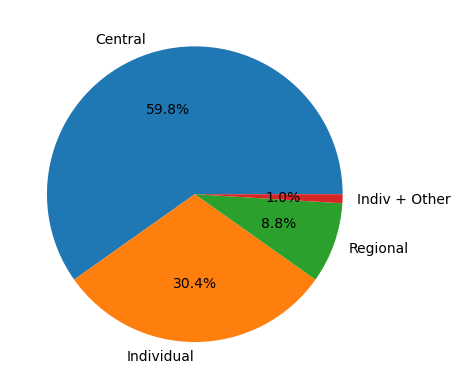

In [25]:
fig, ax = plt.subplots()
ax.pie(count_int_HM, labels=eng_ind_HM, autopct='%1.1f%%')
plt.show()

## Elev_Num; Elevator Number

In [7]:
Elev_Num = df['Elev_Num']
print(f"There are {Elev_Num.isnull().sum()} null values, and they are located at \n{np.where(Elev_Num.isnull())[0]}")

There are 3 null values, and they are located at 
[11 15 36]


In [8]:
Elev_Num = Elev_Num.dropna()
Elev_Num = Elev_Num.astype('int16')

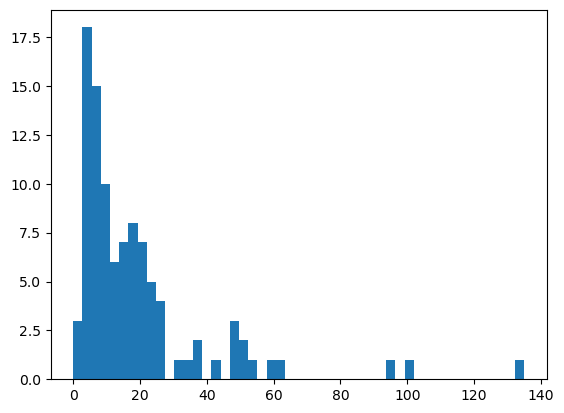

In [9]:
fig, ax = plt.subplots()
b = int(len(Elev_Num)/2)
ax.hist(Elev_Num, bins = b)
plt.show()

In [29]:
Elev_Num.describe()

count     99.000000
mean      19.262626
std       21.582583
min        0.000000
25%        6.500000
50%       12.000000
75%       22.500000
max      135.000000
Name: Elev_Num, dtype: float64

In [30]:
printApt(Elev_Num, df, dfInfo)

kaptCode           A10025263
bjdCode           1174010200
Household_Num           4932
Begin_Date        20190927.0
Heating_Method          지역난방
House_Type               아파트
Elec_Con                종합계약
Elev_Num               135.0
Park_Above               0.0
Park_Below            6905.0
Name: 18, dtype: object
     kaptCode Complex_Name
19  A10025263  고덕 그라시움 아파트


## Electricity Contract; Elec_Con

In [31]:
Elec_Con = df['Elec_Con']
print(f"There are {Elec_Con.isnull().sum()} null values, and they are located at \n{np.where(Elec_Con.isnull())[0]}")

There are 3 null values, and they are located at 
[11 36 82]


In [32]:
Elec_Con = Elec_Con.dropna()

In [33]:
int_EC = pd.factorize(Elec_Con)[0]
ind_EC = pd.factorize(Elec_Con)[1]
print(int_EC)
print(ind_EC)

[0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1
 0 2 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1]
Index(['종합계약', '단일계약', '기타'], dtype='object')


In [34]:
count_int_EC = pd.Series(int_EC).value_counts()
count_int_EC

1    61
0    37
2     1
dtype: int64

In [35]:
eng_ind_EC = ['Comprehensive', 'Single', 'Other']

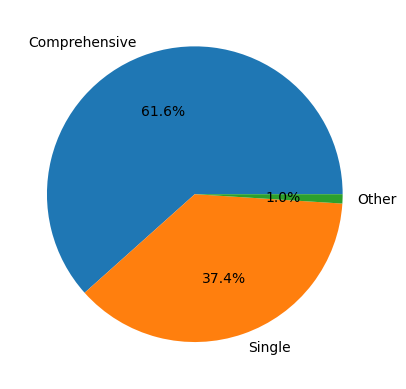

In [36]:
fig, ax = plt.subplots()
ax.pie(count_int_EC, labels=eng_ind_EC, autopct='%1.1f%%')
plt.show()

## Park_Above & Park_Below

In [10]:
Park_Above = df['Park_Above']
Park_Below = df['Park_Below']
print(f"There are {Park_Above.isnull().sum()} null values, and they are located at \n{np.where(Park_Above.isnull())[0]}")
print(f"There are {Park_Below.isnull().sum()} null values, and they are located at \n{np.where(Park_Below.isnull())[0]}")

There are 3 null values, and they are located at 
[11 36 82]
There are 3 null values, and they are located at 
[11 36 82]


In [11]:
Park_Above = Park_Above.dropna().astype('int16')
Park_Below = Park_Below.dropna().astype('int16')
display(Park_Above)
display(Park_Below)

0       355
1      2300
2       462
3       654
4      1104
       ... 
97       19
98        3
99        6
100     876
101      60
Name: Park_Above, Length: 99, dtype: int16

0         0
1         0
2         0
3         0
4         0
       ... 
97     1085
98       80
99     1143
100      20
101     873
Name: Park_Below, Length: 99, dtype: int16

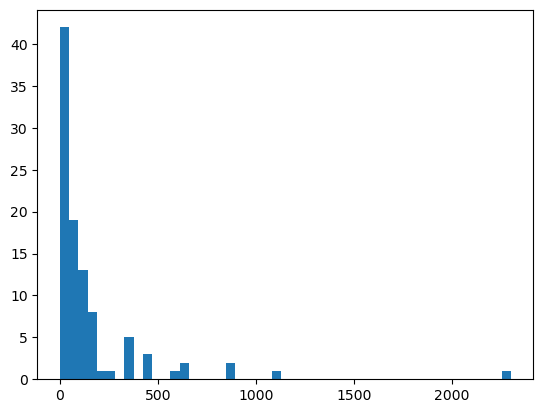

In [12]:
fig, ax = plt.subplots()
b = int(len(Park_Above)/2)
ax.hist(Park_Above, bins = b)
plt.show()

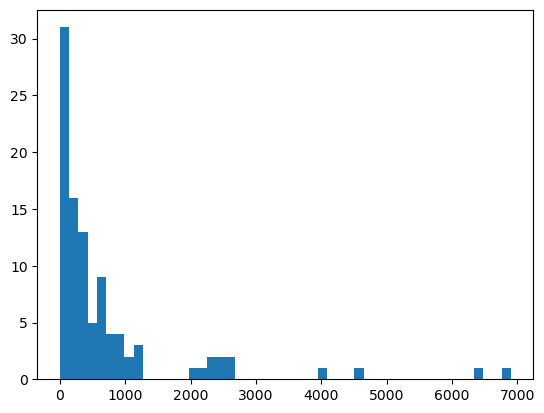

In [13]:
fig, ax = plt.subplots()
b = int(len(Park_Below)/2)
ax.hist(Park_Below, bins = b)
plt.show()

In [41]:
Park_Above.describe()

count      99.000000
mean      154.191919
std       299.007019
min         0.000000
25%        11.000000
50%        60.000000
75%       142.000000
max      2300.000000
Name: Park_Above, dtype: float64

In [42]:
Park_Below.describe()

count      99.000000
mean      704.363636
std      1197.653219
min         0.000000
25%        72.500000
50%       299.000000
75%       697.500000
max      6905.000000
Name: Park_Below, dtype: float64

In [43]:
printApt(Park_Above, df, dfInfo)

kaptCode           A13407104
bjdCode           1174010100
Household_Num           2400
Begin_Date        19831217.0
Heating_Method          중앙난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num                49.0
Park_Above            2300.0
Park_Below               0.0
Name: 1, dtype: object
    kaptCode Complex_Name
1  A13407104     명일삼익그린2차


In [44]:
printApt(Park_Below, df, dfInfo)

kaptCode           A10025263
bjdCode           1174010200
Household_Num           4932
Begin_Date        20190927.0
Heating_Method          지역난방
House_Type               아파트
Elec_Con                종합계약
Elev_Num               135.0
Park_Above               0.0
Park_Below            6905.0
Name: 18, dtype: object
     kaptCode Complex_Name
19  A10025263  고덕 그라시움 아파트
